# Predict if a customer will leave the country !

using the [chrurn dataset](https://www.kaggle.com/filemide/churns#churn_train.csv) investigate the features and there affect on the customer.

then build a logistic regression classifier to predict if a given customer will churn or not !

![churn](../res/chrun.jpeg)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [148]:
df = pd.read_csv("../datasets/churns/TRAIN.csv")

In [149]:
df.head()

Customer ID  network_age  Customer tenure in month  \
0     ADF0039          123                      4.10   
1     ADF0041         1316                     43.87   
2     ADF0051         2385                     79.50   
3     ADF0059         1614                     53.80   
4     ADF0060         2175                     72.50   

   Total Spend in Months 1 and 2 of 2017  Total SMS Spend  Total Data Spend  \
0                                76.7140             0.00              1.25   
1                                98.8904             4.14              1.25   
2                               372.6300             3.51              1.25   
3                               530.2000             6.85              1.25   
4                               554.1300             6.99            153.75   

   Total Data Consumption  Total Unique Calls  Total Onnet spend  \
0                  1.4951                  14                564   
1                  1.0244                  27               1626   
2                  6.0898                 119              10411   
3                  3.3447                  69               6822   
4             673204.0342                  33               3387   

   Total Offnet spend  Total Call centre complaint calls  \
0                6408                                  2   
1                4373                                  1   
2               22039                                  1   
3                6274                                  1   
4                7241                                  1   

  Network type subscription in Month 1 Network type subscription in Month 2  \
0                                   2G                                   2G   
1                                   2G                                   2G   
2                                   2G                                   2G   
3                                   2G                                   2G   
4                                   2G                                   3G   

  Most Loved Competitor network in in Month 1  \
0                                        Uxaa   
1                                        Uxaa   
2                                    Weematel   
3                                           0   
4                                    Weematel   

  Most Loved Competitor network in in Month 2  Churn Status  
0                                       Mango             0  
1                                       Mango             0  
2                                       Mango             0  
3                                       Mango             0  
4                                       Mango             0

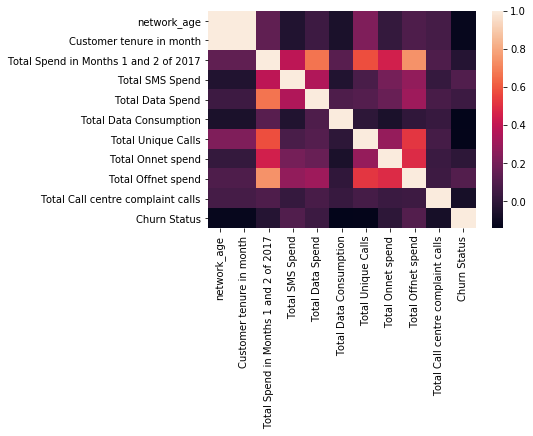

In [150]:
corr = df.corr()
sb.heatmap(corr)

In [151]:
corr

network_age  Customer tenure in month  \
network_age                               1.000000                  1.000000   
Customer tenure in month                  1.000000                  1.000000   
Total Spend in Months 1 and 2 of 2017     0.141199                  0.141199   
Total SMS Spend                          -0.041827                 -0.041827   
Total Data Spend                          0.042025                  0.042027   
Total Data Consumption                   -0.060496                 -0.060496   
Total Unique Calls                        0.227381                  0.227383   
Total Onnet spend                         0.014764                  0.014763   
Total Offnet spend                        0.091263                  0.091265   
Total Call centre complaint calls         0.065511                  0.065511   
Churn Status                             -0.124234                 -0.124233   

                                       Total Spend in Months 1 and 2 of 2017  \
network_age                                                         0.141199   
Customer tenure in month                                            0.141199   
Total Spend in Months 1 and 2 of 2017                               1.000000   
Total SMS Spend                                                     0.392599   
Total Data Spend                                                    0.666606   
Total Data Consumption                                              0.117090   
Total Unique Calls                                                  0.576904   
Total Onnet spend                                                   0.449958   
Total Offnet spend                                                  0.745388   
Total Call centre complaint calls                                   0.090021   
Churn Status                                                       -0.029612   

                                       Total SMS Spend  Total Data Spend  \
network_age                                  -0.041827          0.042025   
Customer tenure in month                     -0.041827          0.042027   
Total Spend in Months 1 and 2 of 2017         0.392599          0.666606   
Total SMS Spend                               1.000000          0.355048   
Total Data Spend                              0.355048          1.000000   
Total Data Consumption                       -0.039647          0.093790   
Total Unique Calls                            0.077086          0.108616   
Total Onnet spend                             0.199451          0.162831   
Total Offnet spend                            0.274817          0.306002   
Total Call centre complaint calls             0.021172          0.076387   
Churn Status                                  0.099149          0.036429   

                                       Total Data Consumption  \
network_age                                         -0.060496   
Customer tenure in month                            -0.060496   
Total Spend in Months 1 and 2 of 2017                0.117090   
Total SMS Spend                                     -0.039647   
Total Data Spend                                     0.093790   
Total Data Consumption                               1.000000   
Total Unique Calls                                  -0.007566   
Total Onnet spend                                   -0.058647   
Total Offnet spend                                   0.004203   
Total Call centre complaint calls                    0.026020   
Churn Status                                        -0.142138   

                                       Total Unique Calls  Total Onnet spend  \
network_age                                      0.227381           0.014764   
Customer tenure in month                         0.227383           0.014763   
Total Spend in Months 1 and 2 of 2017            0.576904           0.449958   
Total SMS Spend                                  0.077086           0.199451   
Total Data Spend       

In [176]:
features = df.iloc[:,[2,3,4,7,8,9]].values
goal = df.iloc[:,-1].values

In [177]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
train_set, test_set, goal_train, goal_test = train_test_split(features,goal,test_size =0.2,random_state=0)

In [178]:
logistic = LogisticRegression(random_state = 0)
logistic.fit(train_set, goal_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [179]:
cm = confusion_matrix(goal_test, logistic.predict(test_set))
pd.DataFrame(cm)

0    1
0  74   52
1  38  116

In [180]:
logistic.score(test_set, goal_test)

0.6785714285714286